<a href="https://colab.research.google.com/github/dennisli8246/Machine-Leaning/blob/main/Tensor_test_11_8_LSTM_IMDB%E8%A9%95%E8%AB%96%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1:準備數據

下載網址:https://ai.stanford.edu/~amaas/data/sentiment/
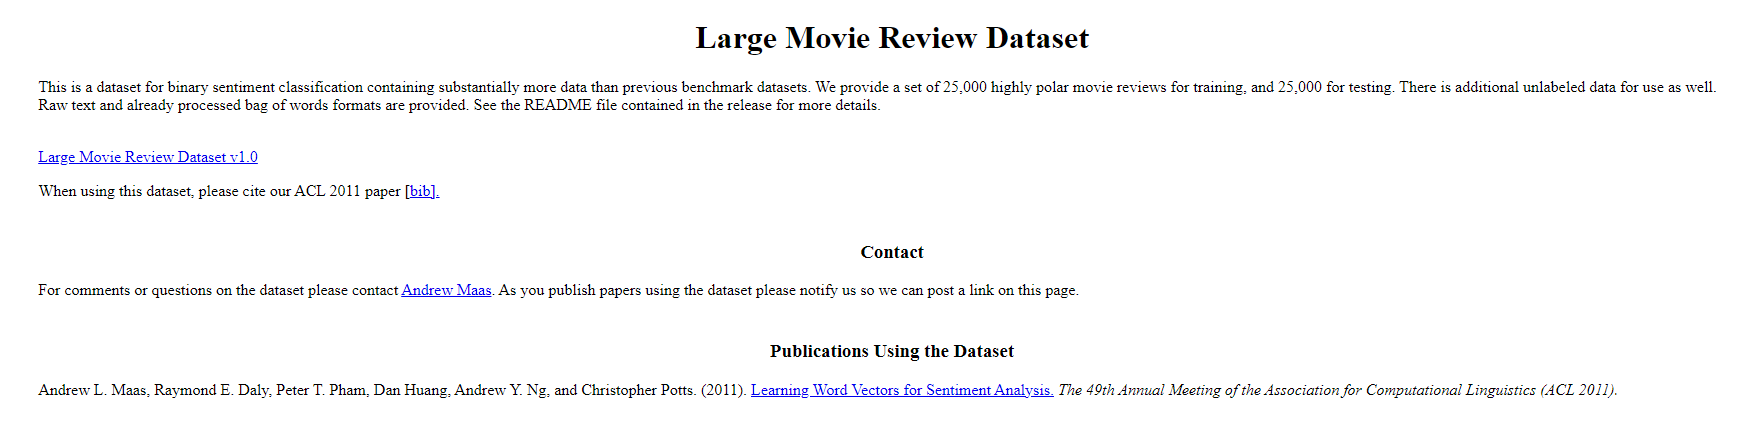

step 2:將自己的雲端硬碟掛載上去,放到data資料夾下

In [ ]:
from google.colab import drive#google colab會把檔案讀到google drive中 #沒有上傳才執行
# 將自己的雲端硬碟掛載上去
drive.mount('/content/drive')#連結自己的雲端硬碟


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


step 3:匯入套件

In [ ]:
import os
from tqdm import tqdm
import pickle

step 4:讀取train/pos資料夾下正面與負面評論檔案,並且將這些文字檔的內容加入倒review_list列表中,並且建立評論的pos與neg標籤,並且將標籤加入至label_list列表中

In [ ]:
review_list=[]
label_list=[]

for label in ['pos','neg']:
  for fname in tqdm(os.listdir(f"/content/drive/My Drive/Colab Notebooks/aclImdb_v1/aclImdb/train/{label}")):
    if 'txt' not in fname:
      continue
    with open(os.path.join(f"/content/drive/My Drive/Colab Notebooks/aclImdb_v1/aclImdb/train/{label}/",fname),encoding='utf-8') as f:
      review_list += [f.read()]
      label_list += [label]

100%|██████████| 1910/1910 [00:03<00:00, 533.97it/s]


step 5:將review_list及label_list,存成Python pickle格式的檔案imdb.pt,以及方便日後的存取

In [ ]:
mydict={'review':review_list,'label':label_list}
with open('/content/drive/My Drive/Colab Notebooks/imdb.pt','wb') as f:
  pickle.dump(mydict,f)

step 6:匯入套件

In [ ]:
import os
import numpy as np
from tqdm import tqdm
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset

step 7:設定device及亂數種子

In [ ]:
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(123)

step 8:讀入訓練數據集

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/imdb.pt','rb') as f:
  new_dict=pickle.load(f)

review_list=new_dict['review']
label_list=new_dict['label']

print(len(review_list),len(label_list))

3848 3848
